In [48]:
import os, random, json

import numpy as np
import tensorflow as tf

from nilearn import plotting, image
from glob import glob

import random

C:\Users\Casper\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Casper\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Casper\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Casper\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

In [24]:
# setting variables

BASE_PATH     = './training_data/'

SAMPLE_NUMBER = '004'
SAMPLE_IMG    = os.path.join(BASE_PATH, f'verse{SAMPLE_NUMBER}.nii.gz')
SAMPLE_CTD    = os.path.join(BASE_PATH, f'verse{SAMPLE_NUMBER}_ctd.json')
SAMPLE_SNAP   = os.path.join(BASE_PATH, f'verse{SAMPLE_NUMBER}_snapshot.png')

In [49]:
# deleting segmentation files

files_to_delete = glob(os.path.join(BASE_PATH, 'verse*_seg.nii.gz'))

if len(files_to_delete) > 0:
    for file in files_to_delete: 
        os.remove(file)
    
IMAGES = glob(os.path.join(BASE_PATH, 'verse*.nii.gz'))
IMAGES_CTD = [path.replace('.nii.gz', '_ctd.json') for path in IMAGES]

LABEL_LIST = [L1, L2, L3, A]

In [26]:
# creating minibatch

samples = random.sample(list(enumerate(IMAGES)), 2)


[
    {
        "Y": 88.0,
        "X": 30.0,
        "Z": 131.0,
        "label": 7
    },
    {
        "Y": 93.0,
        "X": 48.0,
        "Z": 130.0,
        "label": 8
    },
    {
        "Y": 102.0,
        "X": 63.0,
        "Z": 128.0,
        "label": 9
    },
    {
        "Y": 107.0,
        "X": 83.0,
        "Z": 129.0,
        "label": 10
    },
    {
        "Y": 114.0,
        "X": 101.0,
        "Z": 128.0,
        "label": 11
    },
    {
        "Y": 118.0,
        "X": 121.0,
        "Z": 129.0,
        "label": 12
    },
    {
        "Y": 120.0,
        "X": 140.0,
        "Z": 127.0,
        "label": 13
    },
    {
        "Y": 126.0,
        "X": 161.0,
        "Z": 128.0,
        "label": 14
    },
    {
        "Y": 129.0,
        "X": 183.0,
        "Z": 125.0,
        "label": 15
    },
    {
        "Y": 129.0,
        "X": 206.0,
        "Z": 125.0,
        "label": 16
    },
    {
        "Y": 124.0,
        "X": 228.0,
        "Z": 126.0,
        "la

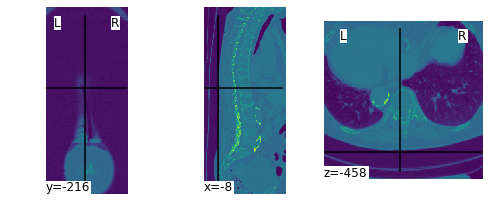

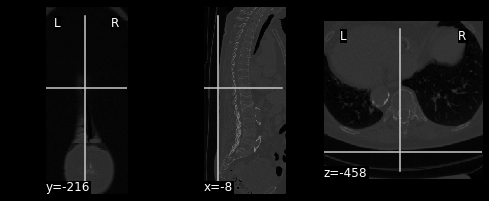

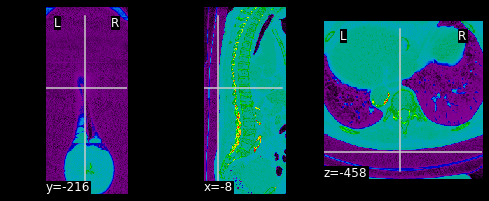

[
    {
        "Y": 44.0,
        "X": 35.0,
        "Z": 75.0,
        "label": 1
    },
    {
        "Y": 49.0,
        "X": 55.0,
        "Z": 77.0,
        "label": 2
    },
    {
        "Y": 50.0,
        "X": 74.0,
        "Z": 79.0,
        "label": 3
    },
    {
        "Y": 51.0,
        "X": 89.0,
        "Z": 79.0,
        "label": 4
    },
    {
        "Y": 56.0,
        "X": 103.0,
        "Z": 78.0,
        "label": 5
    },
    {
        "Y": 63.0,
        "X": 116.0,
        "Z": 77.0,
        "label": 6
    },
    {
        "Y": 73.0,
        "X": 127.0,
        "Z": 75.0,
        "label": 7
    },
    {
        "Y": 87.0,
        "X": 138.0,
        "Z": 75.0,
        "label": 8
    }
]


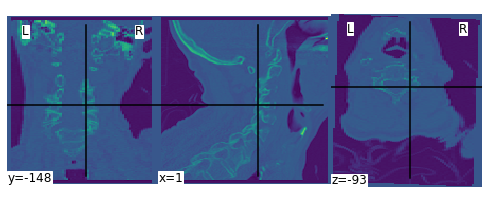

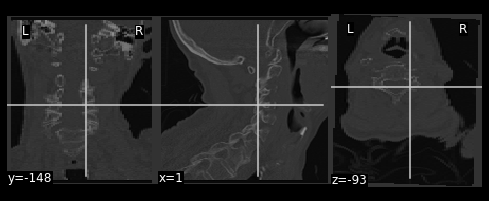

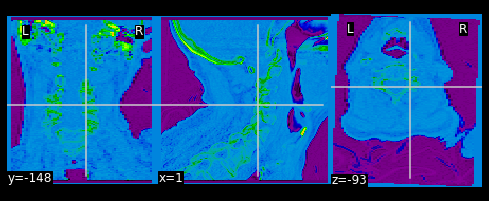

In [32]:
# visualize minibatch

for sample in samples:  
    with open(IMAGES_CTD[sample[0]]) as f: 
        print(json.dumps(json.load(f), indent=4))
    
    plotting.plot_img(sample[1])
    plotting.plot_anat(sample[1])
    plotting.plot_epi(sample[1])
    plotting.show()

In [46]:
from random import random
import numpy as np
# Parameters: 
# image: every [x,y,z] = value, 
# target: every [vertebra,x,y,z] = value (prediction space for every vertebra)
def augment(image):
    shape = (5,5,5)
    x = np.random.randint(0, image.shape[0]-shape[0])
    y = np.random.randint(0,image.shape[1]-shape[1])
    z = np.random.randint(0,image.shape[2]-shape[2])
    aug_image = image[x:x+shape[0],y:y+shape[1],z:z+shape[2]]
    # aug_target = target[:,x:x+shape[0],y:y+shape[1],z:z+shape[2]]
    
    return aug_image #,aug_target)
    

In [47]:
for sample in samples:  
    ndarray = image.get_data(sample[1])
    aug_ndarray = augment(ndarray)
    print(aug_ndarray)

[[[-2.32220535e+01 -4.89736633e+01 -3.94348221e+01 ... -1.40716743e+01
    4.13698769e+01 -1.55789995e+01]
  [ 3.00711731e+02  1.90388412e+02  7.59646530e+01 ...  1.53822441e+01
    9.00666237e+00  1.52785835e+01]
  [ 4.00684631e+02  5.02081543e+02  4.40993225e+02 ...  2.78700008e+01
    2.18377209e+01  4.31555786e+01]
  ...
  [-3.93817482e+01 -6.41630173e+01 -1.28814087e+02 ... -5.16007652e+01
    1.00823336e+01 -4.39608879e+01]
  [-1.28024536e+02 -8.46899872e+01 -7.79060745e+01 ... -2.86700573e+01
   -2.58400631e+01  5.65135689e+01]
  [-9.37056961e+01 -7.52842865e+01 -1.01864342e+02 ... -6.22076569e+01
   -2.45695038e+01 -7.06558990e+01]]

 [[-7.36860046e+01  1.04540844e+01 -8.55285263e+00 ...  1.37348289e+01
    2.48405743e+01  5.26194191e+00]
  [-4.80981102e+01  3.93538780e+01  2.76030636e+01 ...  1.63193588e+01
    3.77738075e+01  3.73751688e+00]
  [-1.17006483e+01  6.57080154e+01  7.14668350e+01 ...  6.65929413e+01
    7.32713699e+01  4.56273422e+01]
  ...
  [-4.89560223e+00  1.5

ValueError: low >= high

In [ ]:
# change voxel size!

In [ ]:
# create YOLO network?
# one centroid location with x,y,w,h and the class (1-25) with a certainty score of: c

In [51]:
# create 3d u-net
# input = image
# output = x*y grid, each containing:
# one centroid location with x,y,w,h and the class (1-25) with a certainty score of: c

def U_net_3D_model():
    inputs = tf.keras.Input(shape=(None,32,64,64))
    
    #block 1
    x = tf.keras.layers.Conv3D(32, (3,3,3) , padding="same") (inputs)
    x = tf.keras.layers.BatchNormalization() (x)
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.Conv3D(64, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    s1 = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(s1)
    
    #block 2
    x = tf.keras.layers.Conv3D(64, (3,3,3) , padding="same") (inputs)
    x = tf.keras.layers.BatchNormalization() (x)
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.Conv3D(128, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    s2 = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(s2)
    
    #block 3
    x = tf.keras.layers.Conv3D(128, (3,3,3) , padding="same") (inputs)
    x = tf.keras.layers.BatchNormalization() (x)
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.Conv3D(256, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    s3 = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(s3)
    
    #bottom
    x = tf.keras.layers.Conv3D(256, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.Conv3D(512, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    # block 4
    x = tf.keras.layers.UpSampling3D(size = (2,2,2)) (x)
    x = concatenate([s3,x], axis = 4)
    
    x = tf.keras.layers.Conv3D(256, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.Conv3D(256, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    # block 5
    x = tf.keras.layers.UpSampling3D(size = (2,2,2)) (x)
    x = concatenate([s2,x], axis = 4)
    
    x = tf.keras.layers.Conv3D(128, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.Conv3D(128, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    # block 6
    x = tf.keras.layers.UpSampling3D(size = (2,2,2)) (x)
    x = concatenate([s2,x], axis = 4)
    
    x = tf.keras.layers.Conv3D(64, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    x = tf.keras.layers.Conv3D(64, (3,3,3) , padding="same") (x)
    x = tf.keras.layers.BatchNormalization()
    x = tf.keras.activations.relu(alpha=0.0, max_value=None, threshold=0) (x)
    
    # output layer
    outputs = tf.keras.layers.Conv3D(25, (1,1,1) , padding="same") (x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [52]:
# loss function
# must generate centroids from 25 output channels
# parameters;
# y_true: 2d-array, list of [x,y,z,label]
def loss(y_true, y_pred):
    threshold = 1
    y_true_x_y_z_labels = []
    for i in range(len(y_pred)):
        if(np.max(y_pred[i]) > threshold):
            newlabel = np.concat(np.argmax(y_pred[i]), [i+1])
            y_true_x_y_z_labels.append(newlabel)
    
    # case 1:
    # if label is in y_true and not in y_pred:
    # check activation strength of location y_true
    
    # case 2:
    # if label is not in y_true and in y_pred:
    # add total output of channel to loss
    
    # case 3:
    # if label is in y_true and y_pred:
    # - check activation strength of location y_true
    # - (or) check distance between y_true and y_pred
    # - 
            
        
    